In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns
dataset = pd.read_csv("preprocessed_data.csv")
dataset

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,...,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Calculated_Date,Age_of_Youtuber
0,1,T-Series,39750000,27454536518,Music,6377,India,Music,1,1,...,17467375,2000000,28,1366417754,5,471031528,21,79,2006-03-13,17
1,3,MrBeast,39750000,27454536518,Entertainment,741,United States,Entertainment,48,1,...,17467375,8000000,88,328239523,15,270663028,37,-96,2012-02-20,11
2,4,Cocomelon - Nursery Rhymes,39750000,27454536518,Education,966,United States,Education,2,2,...,17467375,1000000,88,328239523,15,270663028,37,-96,2006-09-01,17
3,5,SET India,39750000,27454536518,Shows,6377,India,Entertainment,3,2,...,17467375,1000000,28,1366417754,5,471031528,21,79,2006-09-20,17
4,9,Like Nastya,39750000,27454536518,People & Blogs,493,Russia,People,630,5,...,2300000,100000,82,144373535,5,107683889,62,105,2016-01-14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,991,Natan por,12300000,9029609749,Sports,1200,Brazil,Entertainment,525,55,...,17467375,700000,51,212559417,12,183241641,-14,-52,2017-02-12,6
571,992,Free Fire India Official,12300000,1674409945,People & Blogs,1500,India,Games,6141,125,...,3100000,300000,28,1366417754,5,471031528,21,79,2018-09-14,5
572,993,Panda,12300000,2214684303,Uncategorized,2452,United Kingdom,Games,129005,867,...,3200,1000,60,66834405,4,55908316,55,-3,2006-09-11,17
573,994,RobTopGames,12300000,374123483,Gaming,39,Sweden,Games,35112,4,...,185800,100000,67,10285453,6,9021165,60,19,2012-05-09,11


## <font color = 'red'> Exploratory Data Analysis begins <font/>

### Total no. of records

In [46]:
print ("Toal no. of rows",dataset.shape[0])
print ("Toal no. of Cols",dataset.shape[1])

Toal no. of rows 575
Toal no. of Cols 25


### <font color = 'blue'> 1. How many different types of youtuber available across the globe? <font/>

    Totally 575 active youtubers available across the globe. However, there are 12 youtuber names are not known

In [47]:
fig = px.histogram(dataset, x="Youtuber", color = "Youtuber",title= 'No. of Youtubers across Globee')
fig.update_layout(width=1200, height=700)
fig.show()

### <font color = 'blue'> 2. How many Youtubers available in each Country? <font/>

In [103]:
youtuber_eachcounty_df = dataset.groupby(by='Country').agg({"Youtuber": 'count'}).reset_index()
youtuber_eachcounty_df.rename(columns={"Youtuber": "Count of Youtuber", "Country": "Country of Origin"}, inplace=True)
youtuber_eachcounty_df.head()

,Country of Origin,Count of Youtuber
0,Argentina,11
1,Australia,2
2,Barbados,1
3,Brazil,32
4,Canada,6


In [102]:
fig = px.histogram(youtuber_eachcounty_df, y = "Count of Youtuber" , x = "Country of Origin", color = "Country of Origin",
                        title = "YOUTUBER AVAILABLE IN EACH COUNTRY")
fig.update_layout(width=900, height=700)
fig.show()

In [104]:
dataset["video views"] = dataset["video views"].astype('int64') #coverting scientific(+)truncated value to int
dataset["video views"].head()

0    27454536517
1    27454536517
2    27454536517
3    27454536517
4    27454536517
Name: video views, dtype: int64

###  <font color = 'blue'> 3. Which "Youtuber" or "category" or "video views" have Max no. of "subscribers" by Rank? <font/>

In [107]:
video_view_df = dataset.groupby(by = ["rank","Youtuber","category","video views"])["subscribers"].max().reset_index()
video_view_df.sort_values("rank" , ascending=True).head()

,rank,Youtuber,category,video views,subscribers
0,1,T-Series,Music,27454536517,39750000
1,3,MrBeast,Entertainment,27454536517,39750000
2,4,Cocomelon - Nursery Rhymes,Education,27454536517,39750000
3,5,SET India,Shows,27454536517,39750000
4,9,Like Nastya,People & Blogs,27454536517,39750000


### <font color = 'blue'> 4. Which are Top 50 ranked Youtuber by Category? <font/>

In [108]:
dataset_dup = dataset["category"].duplicated()

In [109]:
remove_dupe_category_df = dataset[~dataset_dup]

In [110]:
remove_dupe_category_df.head()

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,...,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Calculated_Date,Age_of_Youtuber
0,1,T-Series,39750000,27454536517,Music,6377,India,Music,1,1,...,17467375,2000000,28,1366417754,5,471031528,21,79,2006-03-13,17
1,3,MrBeast,39750000,27454536517,Entertainment,741,United States,Entertainment,48,1,...,17467375,8000000,88,328239523,15,270663028,37,-96,2012-02-20,11
2,4,Cocomelon - Nursery Rhymes,39750000,27454536517,Education,966,United States,Education,2,2,...,17467375,1000000,88,328239523,15,270663028,37,-96,2006-09-01,17
3,5,SET India,39750000,27454536517,Shows,6377,India,Entertainment,3,2,...,17467375,1000000,28,1366417754,5,471031528,21,79,2006-09-20,17
4,9,Like Nastya,39750000,27454536517,People & Blogs,493,Russia,People,630,5,...,2300000,100000,82,144373535,5,107683889,62,105,2016-01-14,7


In [11]:
category_rank = remove_dupe_category_df[["rank", "category"]]
category_rank.rename(columns = {"rank" : "Rank" , "category" : "Category"}, inplace=True)
#category = category.sort_values(by="video views").head(10)
category_rank.head(50)

C:\Users\YAS\AppData\Local\Temp\ipykernel_13568\2527546830.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Rank,Category
0,1,Music
1,3,Entertainment
2,4,Education
3,5,Shows
4,9,People & Blogs
7,12,Sports
19,30,Film & Animation
23,34,News & Politics
33,45,Gaming
52,71,Trailers


In [112]:
fig = px.pie(category_rank, names='Category', values = 'Rank', color = 'Rank',
      title='RANK OF YOUTUBE CATEGORY').update_traces(textposition='inside', textinfo='value+label')
fig.show()

### <font color = 'blue'> 5. What is the percentage of each Category of Youtuber? <font/>

In [113]:
fig = px.pie(category_rank, names='Category',  color = 'Category',
      title='PERCENTAGE OF EACH CATEGORY OF YOUTUBER ').update_traces(textposition='outside', textinfo='percent+label')
fig.show()

### <font color = 'blue'> 6. How old of each youtube channel? </font>

In [14]:
fig = px.scatter(dataset, x="Youtuber", y="Age_of_Youtuber", color = "Age_of_Youtuber", title="AGE OF YOUTUBER")
fig.show()

### <font color = 'blue'> 7. Which youtuber gets highest monthly income? <font/>

In [114]:
higest_monthly_df = dataset.groupby(by=["Youtuber"])["highest_monthly_earnings"].max().reset_index()
higest_monthly_df.sort_values("highest_monthly_earnings", ascending=False)

,Youtuber,highest_monthly_earnings
109,Dangal TV Channel,1451750
198,ILYA BORZOV,1451750
530,Zee Music Company,1451750
531,Zee News,1451750
532,Zee TV,1451750
...,...,...
67,CKN,0
5,A4,0
117,Deddy Corbuzier,0
295,Marvel Entertainment,0


In [16]:
fig = px.scatter(higest_monthly_df, x="Youtuber", y="highest_monthly_earnings",  color = "Youtuber", symbol = "Youtuber",
                title = "YOUTUBER GETTING HIGHEST MONTHLY SALARY")
fig.update_layout(width=1100, height=700)
fig.show()

### <font color = 'blue'> 8. Which youtuber gets highest yearly income? <font/>

In [17]:
higest_yearly_df = dataset.groupby(by=["Youtuber"])["highest_yearly_earnings"].max().reset_index()
higest_yearly_df.sort_values("highest_yearly_earnings", ascending=False)

,Youtuber,highest_yearly_earnings
230,Junya,17467375.0
84,Cocomelon - Nursery Rhymes,17467375.0
235,KIMPRO,17467375.0
252,LIV Crime,17467375.0
109,Dangal TV Channel,17467375.0
...,...,...
384,SIS vs BRO,5.0
5,A4,5.0
117,Deddy Corbuzier,4.0
295,Marvel Entertainment,3.0


In [18]:
fig = px.histogram(higest_yearly_df, y="highest_yearly_earnings", x= "Youtuber", color = "Youtuber",
                    title="YOUTUBER GETTING HIGHEST YEARLY SALARY").update_xaxes(categoryorder="total descending")
fig.update_layout(width=1200, height=600)
fig.show()

### <font color = 'blue'> 9. Which youtube channel type attracts more / less / average audience for the last 30 days? <font/>

##### <font color = 'green'>  Youtube channel type that attracts more audience for the last 30 days <font/>

In [19]:
sub_for_last30_max = dataset.groupby(by=["video_views_rank","channel_type"])["subscribers_for_last_30_days"].max().reset_index()
sub_for_last30_max.sort_values("subscribers_for_last_30_days", ascending=False).head()

,video_views_rank,channel_type,subscribers_for_last_30_days
38,48.0,Entertainment,8000000.0
298,656.0,Entertainment,6700000.0
447,1882.0,Entertainment,5500000.0
290,608.0,People,3400000.0
90,125.0,People,3200000.0


##### <font color = 'green'> Youtube channel type that attracts less audience for the last 30 days <font/>

In [20]:
sub_for_last30_min = dataset.groupby(by=["video_views_rank","channel_type"])["subscribers_for_last_30_days"].min().reset_index()
sub_for_last30_min.sort_values("subscribers_for_last_30_days", ascending=True).head()

,video_views_rank,channel_type,subscribers_for_last_30_days
570,4051001.0,People,1.0
567,4032620.0,People,1.0
556,3188353.0,Music,1.0
559,3539124.0,Entertainment,1.0
563,3967392.0,Music,3.0


##### <font color = 'green'> Youtube channel type that have average attraction by audience for the last 30 days <font/>

In [117]:
# Set the display option for float format
pd.options.display.float_format = '{:.0f}'.format
# Calculate the mean
channel_sub_for_last_30_avg  = dataset.groupby(by=["video_views_rank","channel_type"])["subscribers_for_last_30_days"].mean().reset_index()
channel_sub_for_last_30_avg.sort_values("subscribers_for_last_30_days", ascending = False)

,video_views_rank,channel_type,subscribers_for_last_30_days
38,48,Entertainment,8000000
298,656,Entertainment,6700000
447,1882,Entertainment,5500000
290,608,People,3400000
90,125,People,3200000
...,...,...,...
563,3967392,Music,3
559,3539124,Entertainment,1
556,3188353,Music,1
567,4032620,People,1


### <font color = 'blue'> 10. Which country has more category with ranks? <font/>

In [22]:
#pip install folium

In [23]:
import folium
from folium.plugins import MarkerCluster

world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(dataset)):
        lat = dataset.iloc[i]['Latitude']
        long = dataset.iloc[i]['Longitude']
        popup_text = """Country"""
        radius=5
        popup_text = popup_text.format(
                                   dataset.iloc[i]['rank'],
                                    dataset.iloc[i]["category"]
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

### <font color = 'blue'> 11. Which country has more (or) less Age of each youtuber by category across the globe? <font/>

In [24]:
# Create a figure
fig = px.scatter_geo(
    data_frame=dataset,
    lat="Latitude",
    lon="Longitude",
    color="Age_of_Youtuber",
    hover_name="Country", 
    projection="natural earth",  # Use a world map projection
    title="Age of YouTubers by Location",
    animation_frame="category"      
)
fig.update_layout(width=900, height=500)

#fig.write_html("output_map.html")

import webbrowser  # to be shown in a web browser
webbrowser.open("output_map.html", new=2)

# Show the figure
fig.show()

### <font color = 'blue'> 12.Which majority of countries interested to watch what type of Category? <font/>

In [25]:
entertainment_channel_df = dataset[dataset["category"].str.contains("Entertainment")]
entertainment_channel_df.sort_values(by="Country")
entertainment_channel_df = entertainment_channel_df.groupby(by=["category","Country"])["subscribers"].max().reset_index()
entertainment_channel_df.sort_values("subscribers").head(10)

,category,Country,subscribers
4,Entertainment,Ecuador,14600000
15,Entertainment,Singapore,16200000
23,Entertainment,Vietnam,17900000
17,Entertainment,Spain,18700000
20,Entertainment,Ukraine,18800000
19,Entertainment,Turkey,19600000
3,Entertainment,Colombia,20200000
16,Entertainment,South Korea,20500000
5,Entertainment,Germany,23000000
11,Entertainment,Mexico,24200000


In [26]:
fig = px.pie(entertainment_channel_df, names="Country", values="subscribers", color = "Country",
              title='MAJORITY OF COUNTRIES INTERESTED TO WATCH ENTAINMENT CATEGORY,\n').update_traces(textposition='inside', textinfo='label+value')
fig.show()

### <font color = 'blue'> 13. Compare no. of youtuber in each country wrt population and total video viewed? <font/>

In [27]:
df = dataset.groupby(by='Country').agg({'Youtuber' : 'count', 'Population' : 'max', 'video views' : 'mean'}).rename(columns={'Youtuber': 'COUNT OF YOUTUBER', 'Population' : 'POPULATION','video views': 'TOTAL VIDEO VIEWS BY COUNTRY'}).reset_index()
df = df.sort_values('COUNT OF YOUTUBER', ascending=False)
df.head()

,Country,COUNT OF YOUTUBER,POPULATION,TOTAL VIDEO VIEWS BY COUNTRY
39,United States,191,328239523,11671824134
14,India,140,1366417754,11072476995
3,Brazil,32,212559417,8966483997
38,United Kingdom,27,66834405,9903335329
15,Indonesia,19,270203917,6860198383


In [28]:
fig = px.bar(df, x='Country', y='COUNT OF YOUTUBER', color='TOTAL VIDEO VIEWS BY COUNTRY',hover_data='POPULATION',
             title= 'No. of Chinese Restaurant by Places')
fig.show()

### <font color = 'blue'> 14. Which country has more Unemloyment rate? <font/>

In [29]:
Unemploy_rate_df = dataset.groupby(by=["Country","Population"])["Unemployment rate"].max().reset_index()
Unemploy_rate_df.sort_values("Population", ascending = False).head()

,Country,Population,Unemployment rate
6,China,1397715000,4
14,India,1366417754,5
39,United States,328239523,15
15,Indonesia,270203917,5
24,Pakistan,216565318,4


### <font color = 'blue'> 15. What is the correlation between "Population" and "Unemloyment rate"? <font/>

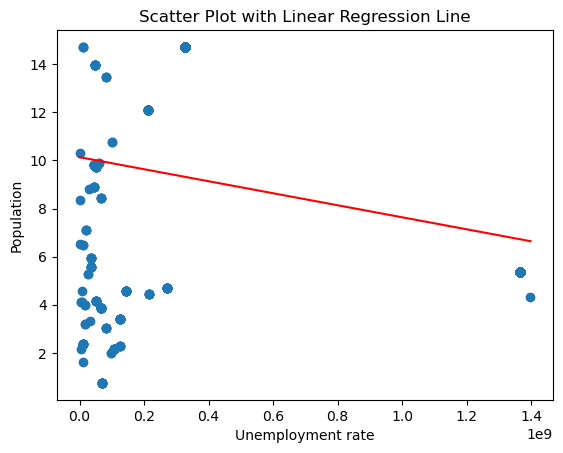

In [118]:
correlation= dataset[["Population", "Unemployment rate"]].corr()

plt.scatter(dataset["Population"], dataset["Unemployment rate"])

# Fit a linear regression line to the data
coefficients = np.polyfit(dataset["Population"], dataset["Unemployment rate"], 1)
line_function = np.poly1d(coefficients)

# Generate x values for the line of best fit
x_values = np.linspace(dataset["Population"].min(), dataset["Population"].max())

# Calculate corresponding y values using the line function
y_values = line_function(x_values)

# Plot the line of best fit in red
plt.plot(x_values, y_values, color='red')

plt.ylabel("Population")
plt.xlabel("Unemployment rate")
plt.title("Scatter Plot with Linear Regression Line")
plt.grid(False)
plt.show()

In [31]:
dataset[["Population","Urban_population"]].cov()

,Population,Urban_population
Population,263056768620467328,77215267182224416
Urban_population,77215267182224416,26707320693094012


### <font color = 'blue'> 16. What is the relationship between highest_monthly_earnings & subscribers_for_last_30_days each country? <font/>

In [32]:
monthly_earning = dataset.groupby(by='Country').agg({"highest_monthly_earnings" : 'max', "subscribers_for_last_30_days":'count'}).reset_index()
monthly_earning.sort_values("subscribers_for_last_30_days", ascending = False).head()

,Country,highest_monthly_earnings,subscribers_for_last_30_days
39,United States,1451750,191
14,India,1451750,140
3,Brazil,1451750,32
38,United Kingdom,1451750,27
15,Indonesia,1451750,19


In [33]:
fig = px.scatter(monthly_earning, y = "Country", x = "subscribers_for_last_30_days", color="highest_monthly_earnings")
fig.show()

### <font color = 'blue'> 17. What is the relationship among "Gross tertiary education enrollment(%)" and other variables? <font/>

In [34]:
gross_ter_edu_df = dataset.groupby(by=["Youtuber","Country","Population","category","highest_yearly_earnings","Latitude","Longitude"])["Gross tertiary education enrollment (%)"].max().reset_index()
gross_ter_edu_df.sort_values("Gross tertiary education enrollment (%)", ascending = False)

,Youtuber,Country,Population,category,highest_yearly_earnings,Latitude,Longitude,Gross tertiary education enrollment (%)
197,How Ridiculous,Australia,25766605,Sports,17467375,-25,134,113
472,Trap City,Australia,25766605,Music,7,-25,134,113
215,JYP Entertainment,South Korea,51709098,Music,14800000,36,128,94
484,Unknow_youtuber,South Korea,51709098,Entertainment,65700,36,128,94
306,Mnet K-POP,South Korea,51709098,Entertainment,7600000,36,128,94
...,...,...,...,...,...,...,...,...
179,Geo News,Pakistan,216565318,News & Politics,4800000,30,69,9
521,Wolfoo Channel,Pakistan,216565318,Uncategorized,28,30,69,9
192,HUM TV,Pakistan,216565318,Entertainment,17467375,30,69,9
190,HAR PAL GEO,Pakistan,216565318,Entertainment,17467375,30,69,9


In [35]:
fig = px.scatter_geo(
    data_frame=gross_ter_edu_df,
    lat="Latitude",
    lon="Longitude",
    color="Gross tertiary education enrollment (%)",
    hover_name="Country", 
    projection="natural earth",  # Use a world map projection
    title="Age of YouTubers by Location",
    hover_data="category", 
    basemap_visible=True, 
    animation_frame="highest_yearly_earnings"      
)
fig.update_layout(width=900, height=500)

#fig.write_html("output_map.html")

#import webbrowser  # to be shown in a web browser
#webbrowser.open("output_map.html", new=2)

# Show the figure
fig.show()

###  <font color = 'blue'> 18. What are the percentage of youtubers by Country Ranking across globe ? <font/> 

In [36]:
rating_type_df = dataset['country_rank'].value_counts().reset_index()
rating_type_df.rename(columns={'country_rank':'COUNTRY RANK', 'count':'COUNT OF YOUTUBER'}, inplace=True)
rating_type_df.sort_values("COUNTRY RANK", ascending = True)

,COUNTRY RANK,COUNT OF YOUTUBER
0,1,33
1,2,23
2,3,16
4,4,12
3,5,13
...,...,...
122,4044,1
159,4093,1
152,5208,1
162,6143,1


In [37]:
fig = px.pie(rating_type_df, names='COUNTRY RANK', values = 'COUNT OF YOUTUBER', color = 'COUNTRY RANK',
      title='PERCENTAGE OF YOUTUBER BY COUNTRY RANK').update_traces(textposition='inside', textinfo='percent')
fig.show()

### <font color = 'blue'> 19. What is the Avg video views for last 30 days for each Channel Type?<font/>

In [38]:
highest_vid_view_last_30_days_df = dataset.groupby(by=['Country','channel_type'])['video_views_for_the_last_30_days'].mean().reset_index()
highest_vid_view_last_30_days_df.rename(columns ={'Country' : 'Country', 'channel_type' : 'channel_type','video_views_for_the_last_30_days':'views last 30 days'},inplace = True )
highest_vid_view_last_30_days_df.sort_values(by='views last 30 days').head()

,Country,channel_type,views last 30 days
21,Chile,People,49
27,Cuba,People,94
5,Australia,People,147
84,Samoa,Music,379
75,Pakistan,People,590


In [39]:
fig = px.scatter(highest_vid_view_last_30_days_df, y="Country", x="channel_type", color="views last 30 days", 
 title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.update_layout(width=900, height=600)
fig.show()

### <font color = 'blue'> 20. Which are the youtubers getting lucrative annual earnings?<font/>

###### To indentify lucrative annual revenue for youtubers let us take 25th percentile of max highest_yearly_earnings. Here max highest_yearly_earnings is 17467375.0 & 25th percentile of it is 4366843.75

In [120]:
max_yearly_earnings = dataset["highest_yearly_earnings"].max()
max_yearly_earnings
one_fourth_yearly_earnings = max_yearly_earnings/4
one_fourth_yearly_earnings

4366843.75

###### Getting "highest_yearly_earnings" >= 4366843.75 consider to be pretty decent and lucrative yearly earning

In [121]:
# Filter highest_yearly_earnings greater than or equal to 4366843.75
decent_yly_income_df = dataset[["Youtuber","Age_of_Youtuber","subscribers","category","Country","video views","highest_yearly_earnings"]]
decent_yly_income_df = decent_yly_income_df[decent_yly_income_df["highest_yearly_earnings"] >= 4366843.75]
decent_yly_income_df = decent_yly_income_df.sort_values("highest_yearly_earnings")
decent_yly_income_df 

,Youtuber,Age_of_Youtuber,subscribers,category,Country,video views,highest_yearly_earnings
435,Jesser,11,14600000,Gaming,United States,3603556207,4400000
538,Akon,17,12900000,Music,United States,6300933122,4400000
378,Katakit Baby TV,13,15500000,Music,Saudi Arabia,6386271870,4400000
502,Vlad y Niki Show,4,13400000,Uncategorized,United States,4622628957,4400000
326,Queen Official,15,17000000,Music,United Kingdom,10847948832,4500000
...,...,...,...,...,...,...,...
208,Sagawa,2,22000000,Entertainment,Japan,18347969186,17467375
211,Topper Guild,9,21900000,Comedy,United States,15552070846,17467375
215,ZAMZAM ELECTRONICS TRADING,2,21700000,Uncategorized,United Arab Emirates,8507818877,17467375
182,Tilak,2,23400000,Film & Animation,India,9465863821,17467375


##### filter less than or equal to Average subscribers

In [123]:
subscribers_count = dataset[dataset["subscribers"] <= 21730173]
subscribers_count

,rank,Youtuber,subscribers,video views,category,uploads,Country,channel_type,video_views_rank,country_rank,...,highest_yearly_earnings,subscribers_for_last_30_days,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,Calculated_Date,Age_of_Youtuber
215,333,ZAMZAM ELECTRONICS TRADING,21700000,8507818877,Uncategorized,6377,United Arab Emirates,People,608,4,...,17467375,3400000,37,9770529,2,8479744,23,54,2020-12-19,2
216,334,DUDU e CAROL,21600000,9597894786,Autos & Vehicles,2942,Brazil,Entertainment,481,15,...,9300000,300000,51,212559417,12,183241641,-14,-52,2013-03-02,10
217,335,Village Cooking Channel,21600000,5863377051,Howto & Style,219,India,Howto,1082,66,...,9300000,400000,28,1366417754,5,471031528,21,79,2018-04-25,5
218,337,Tekashi 6ix9ine,21500000,5890180734,People & Blogs,51,United States,Music,1081,96,...,5400000,200000,88,328239523,15,270663028,37,-96,2018-04-06,5
219,340,invictor,21500000,8409641722,Gaming,17,Chile,People,4038708,2889,...,2,4,88,18952038,7,16610135,-36,-72,2016-07-26,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,991,Natan por,12300000,9029609749,Sports,1200,Brazil,Entertainment,525,55,...,17467375,700000,51,212559417,12,183241641,-14,-52,2017-02-12,6
571,992,Free Fire India Official,12300000,1674409945,People & Blogs,1500,India,Games,6141,125,...,3100000,300000,28,1366417754,5,471031528,21,79,2018-09-14,5
572,993,Panda,12300000,2214684303,Uncategorized,2452,United Kingdom,Games,129005,867,...,3200,1000,60,66834405,4,55908316,55,-3,2006-09-11,17
573,994,RobTopGames,12300000,374123483,Gaming,39,Sweden,Games,35112,4,...,185800,100000,67,10285453,6,9021165,60,19,2012-05-09,11


### <font color = 'blue'> 21. Compare "subscribers" < = (mean) 21730173 and list down lucrative yearly earnings by each youtuber across the globe? <font/>

In [131]:
high_yly_earnings = pd.merge(decent_yly_income_df,subscribers_count) # merge above two tables 
high_yly_earnings = high_yly_earnings[["Youtuber","Age_of_Youtuber","subscribers","category","Country","video views","highest_yearly_earnings"]]
high_yly_earnings.sort_values("highest_yearly_earnings")# "highest_yearly_earnings" >= 4366843.75 with "subscribers" <= 21730173] 

,Youtuber,Age_of_Youtuber,subscribers,category,Country,video views,highest_yearly_earnings
0,Jesser,11,14600000,Gaming,United States,3603556207,4400000
1,Akon,17,12900000,Music,United States,6300933122,4400000
2,Katakit Baby TV,13,15500000,Music,Saudi Arabia,6386271870,4400000
3,Vlad y Niki Show,4,13400000,Uncategorized,United States,4622628957,4400000
4,Queen Official,15,17000000,Music,United Kingdom,10847948832,4500000
...,...,...,...,...,...,...,...
143,Filaretiki,2,14800000,Uncategorized,United States,15788208522,17467375
144,Daily Dose Of Internet,8,16100000,Entertainment,United States,6872702790,17467375
145,tuzelity SHUFFLE,7,20700000,People & Blogs,Russia,8658941531,17467375
147,dednahype,3,20200000,Comedy,Latvia,20919403720,17467375


### <font color = 'blue'> 22. Which are the youtubers getting lucrative monthly earnings?<font/>

###### To indentify lucrative monthly revenue for youtubers let us take 25th percentile of max highest_monthly_earnings . Here max highest_monthly_earnings  is 1451750.0 & 25th percentile of it is 362937.5

In [127]:
max_monthly_earnings = dataset["highest_monthly_earnings"].max()
max_monthly_earnings
max_monthly_earnings = max_monthly_earnings/4
max_monthly_earnings

362937.5

###### Getting "highest_monthly_earnings" >= 362937.5 consider to be pretty decent and lucrative monthly earning

In [129]:
# Filter highest_monthly_earnings greater than or equal to 362937.5
decent_mly_income_df = dataset[["Youtuber","Age_of_Youtuber","subscribers","category","Country","video views","highest_monthly_earnings"]]
decent_mly_income_df = decent_mly_income_df[decent_mly_income_df["highest_monthly_earnings"] >= 362937.5]
decent_mly_income_df = decent_mly_income_df.sort_values("highest_monthly_earnings")
decent_mly_income_df

,Youtuber,Age_of_Youtuber,subscribers,category,Country,video views,highest_monthly_earnings
378,Katakit Baby TV,13,15500000,Music,Saudi Arabia,6386271870,363700
538,Akon,17,12900000,Music,United States,6300933122,365000
502,Vlad y Niki Show,4,13400000,Uncategorized,United States,4622628957,368900
435,Jesser,11,14600000,Gaming,United States,3603556207,370400
191,White Hill Music,9,23000000,Entertainment,India,10939966484,372700
...,...,...,...,...,...,...,...
208,Sagawa,2,22000000,Entertainment,Japan,18347969186,1451750
211,Topper Guild,9,21900000,Comedy,United States,15552070846,1451750
215,ZAMZAM ELECTRONICS TRADING,2,21700000,Uncategorized,United Arab Emirates,8507818877,1451750
182,Tilak,2,23400000,Film & Animation,India,9465863821,1451750


### <font color = 'blue'> 23. Compare "subscribers" < = (mean) 21730173 and list down lucrative monthly earnings by each youtuber across the globe? <font/>

In [138]:
high_mly_earnings = pd.merge(decent_mly_income_df,subscribers_count) # merge above two tables 
high_mly_earnings = high_mly_earnings[["Youtuber","Age_of_Youtuber","subscribers","category","Country","video views","highest_monthly_earnings"]]
high_mly_earnings.sort_values("highest_monthly_earnings")# "highest_monthly_earnings" >= 362937.5 with "subscribers" <= 21730173] 

,Youtuber,Age_of_Youtuber,subscribers,category,Country,video views,highest_monthly_earnings
0,Katakit Baby TV,13,15500000,Music,Saudi Arabia,6386271870,363700
1,Akon,17,12900000,Music,United States,6300933122,365000
2,Vlad y Niki Show,4,13400000,Uncategorized,United States,4622628957,368900
3,Jesser,11,14600000,Gaming,United States,3603556207,370400
4,Queen Official,15,17000000,Music,United Kingdom,10847948832,375100
...,...,...,...,...,...,...,...
142,GH'S,3,13000000,Gaming,South Korea,8739174649,1451750
143,Filaretiki,2,14800000,Uncategorized,United States,15788208522,1451750
144,Daily Dose Of Internet,8,16100000,Entertainment,United States,6872702790,1451750
147,dednahype,3,20200000,Comedy,Latvia,20919403720,1451750
